In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
airbnb_df = pd.read_csv('airBNB_clean.csv')

In [21]:
airbnb_df.isnull().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Day_Of_Week                       0
Month                             0
Year                              0
Seasons                           0
dtype: int64

In [22]:
airbnb_df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Month,Year,Seasons
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,...,1,9,2018-10-19,0.21,6,365,19,October,2018,Fall
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,...,1,45,2019-05-21,0.38,2,355,21,May,2019,Spring
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,...,3,0,2019-05-21,1.37,1,365,21,May,2019,Spring
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,...,1,270,2019-07-05,4.64,1,194,5,July,2019,Summer
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,...,10,9,2018-11-19,0.10,1,0,19,November,2018,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48853,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,...,2,0,2019-07-08,1.37,2,9,8,July,2019,Summer
48854,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,...,4,0,2019-07-08,1.37,2,36,8,July,2019,Summer
48855,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,...,10,0,2019-07-08,1.37,1,27,8,July,2019,Summer
48856,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,...,1,0,2019-07-08,1.37,6,2,8,July,2019,Summer


In [23]:
airbnb_df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Day_Of_Week', 'Month', 'Year', 'Seasons'],
      dtype='object')

In [24]:
airbnb_df['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_66276/3630977055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_df['price']);


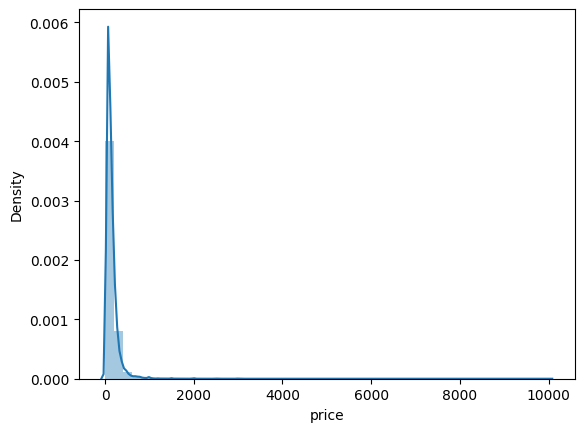

In [25]:
sns.distplot(airbnb_df['price']);

In [26]:
label_encoder = preprocessing.LabelEncoder()
airbnb_df['name']= label_encoder.fit_transform(airbnb_df['name'])
airbnb_df['host_name']= label_encoder.fit_transform(airbnb_df['host_name'])
airbnb_df['neighbourhood_group']= label_encoder.fit_transform(airbnb_df['neighbourhood_group'])
airbnb_df['neighbourhood']= label_encoder.fit_transform(airbnb_df['neighbourhood'])
airbnb_df['room_type']= label_encoder.fit_transform(airbnb_df['room_type'])
airbnb_df['Month']= label_encoder.fit_transform(airbnb_df['Month'])
airbnb_df['Year']= label_encoder.fit_transform(airbnb_df['Year'])
airbnb_df['Seasons']= label_encoder.fit_transform(airbnb_df['Seasons'])

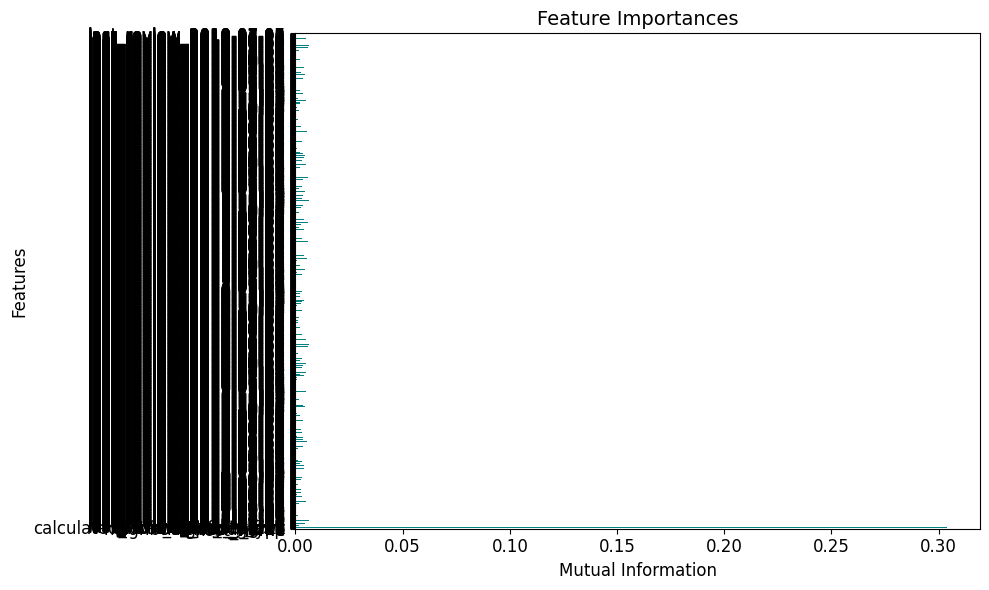

In [27]:
Y = airbnb_df['price']
X = pd.get_dummies(airbnb_df[[ 'name','host_name','neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']])
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()

In [28]:
selected_columns = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count',    'availability_365',    'Day_Of_Week']
X = airbnb_df[selected_columns] 
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

selected_features

array([ True,  True,  True,  True,  True,  True,  True])

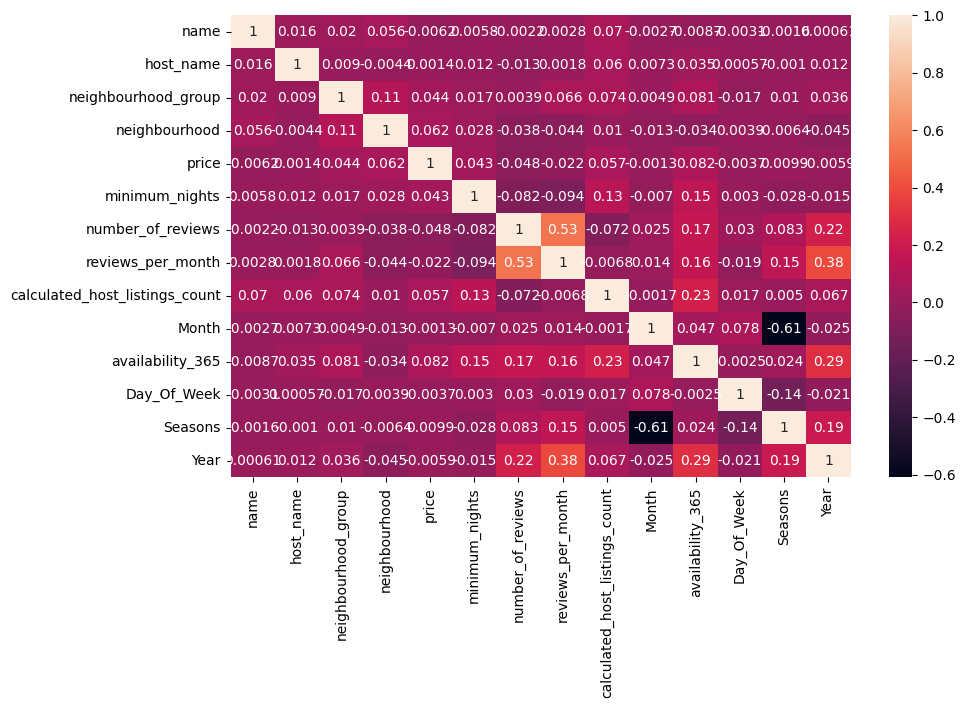

In [29]:
selected_columns = ['name', 'host_name','neighbourhood_group','neighbourhood','price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','Month','availability_365','Day_Of_Week','Seasons','Year']
subset_df = airbnb_df[selected_columns]
cor = subset_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True)
plt.show()

In [30]:
Q1 = airbnb_df['price'].quantile(0.25)
Q3 = airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 106.0


In [31]:
print("Skewness: %f" % airbnb_df['price'].skew())
print("Kurtosis: %f" % airbnb_df['price'].kurt())

Skewness: 19.114478
Kurtosis: 585.345600


In [32]:
negative_values = airbnb_df[airbnb_df['price'] < 0]

if negative_values.empty:
    print("No negative values found in the 'price' column.")
else:
    print("Negative values found in the 'price' column:")
    print(negative_values)

No negative values found in the 'price' column.


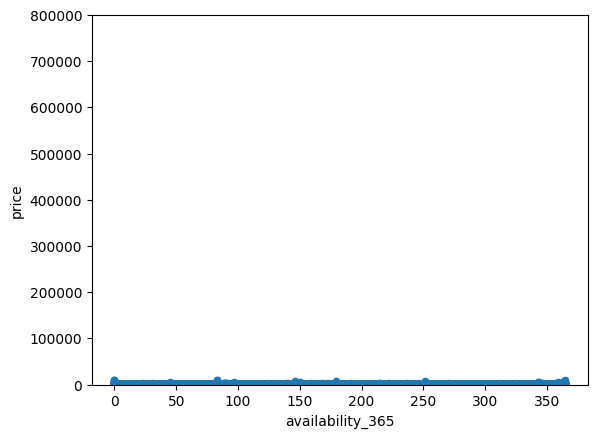

In [33]:
var = 'availability_365'
data = pd.concat([airbnb_df['price'], airbnb_df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000));

In [ ]:
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/Users/damacm172_/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


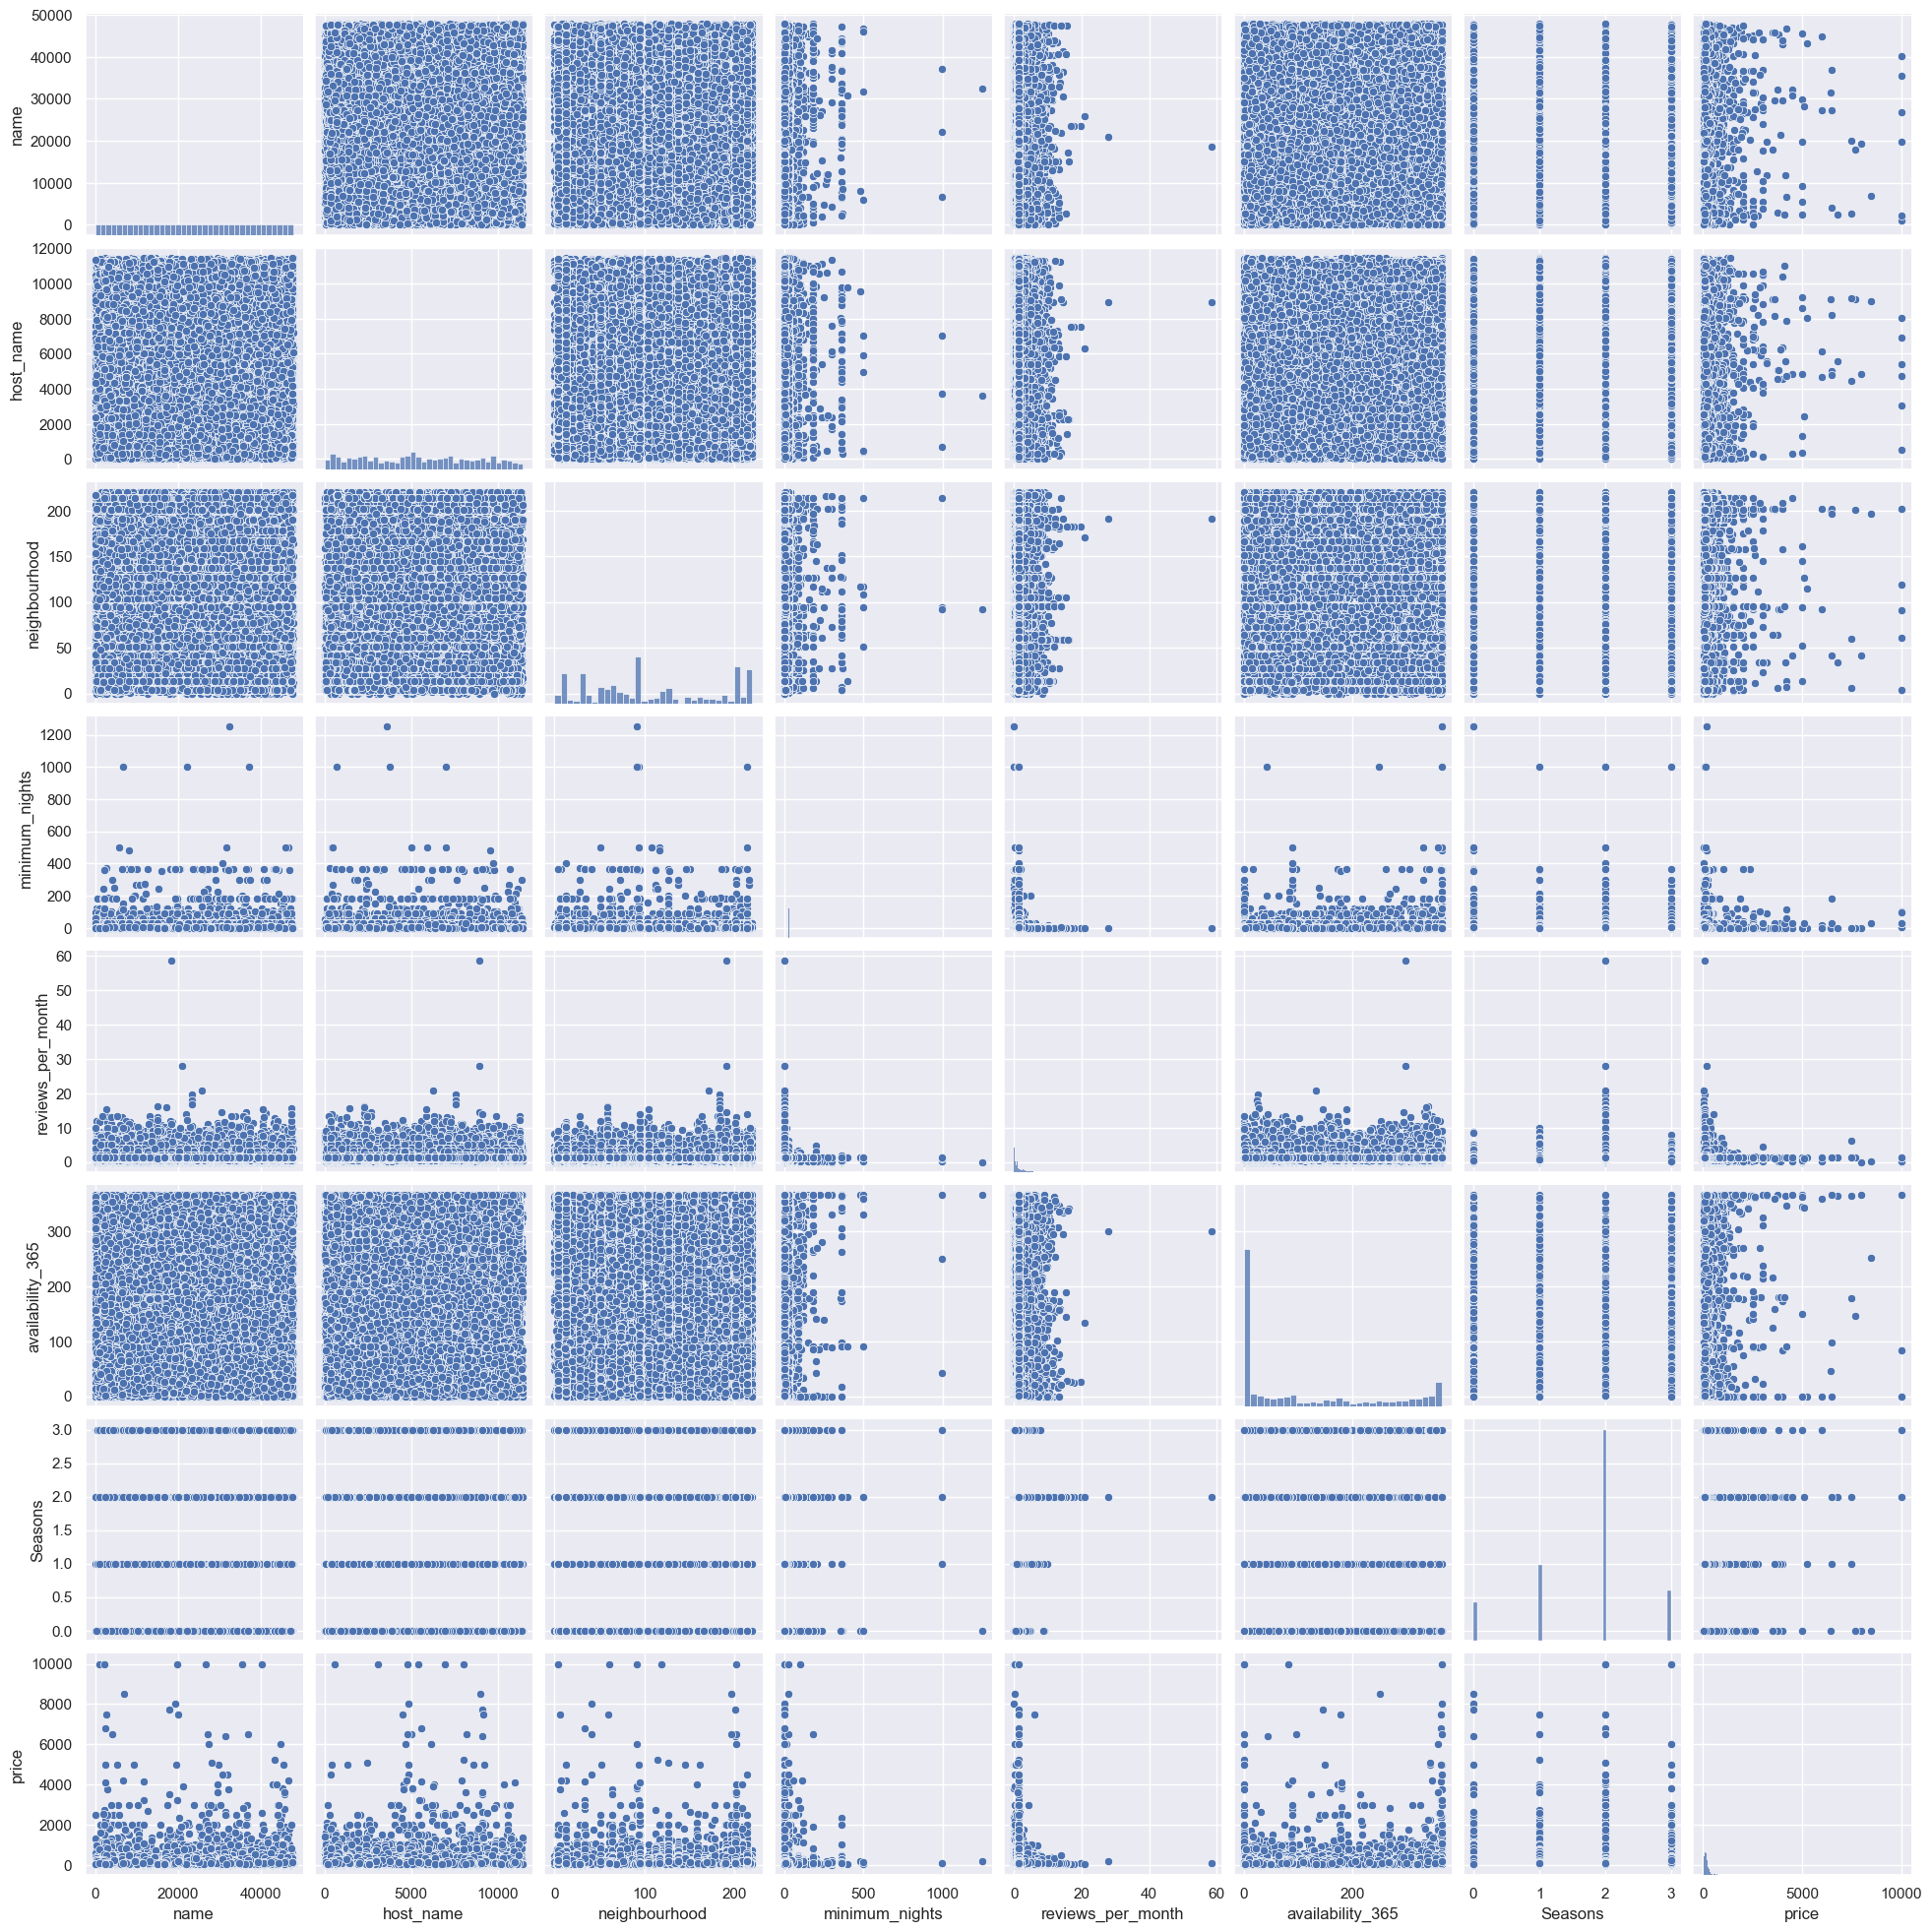

In [35]:
sns.set()
cols = ['name','host_name','neighbourhood','minimum_nights', 'reviews_per_month','availability_365','Seasons', 'price']

sns.pairplot(airbnb_df[cols], size = 2.5)
plt.show();

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_66276/321508828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_df['price'], fit=stats.norm);


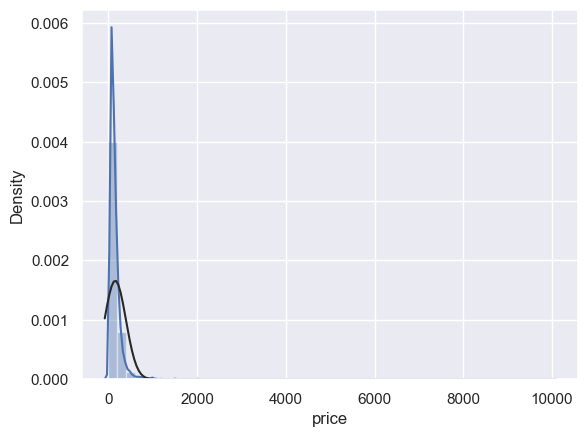

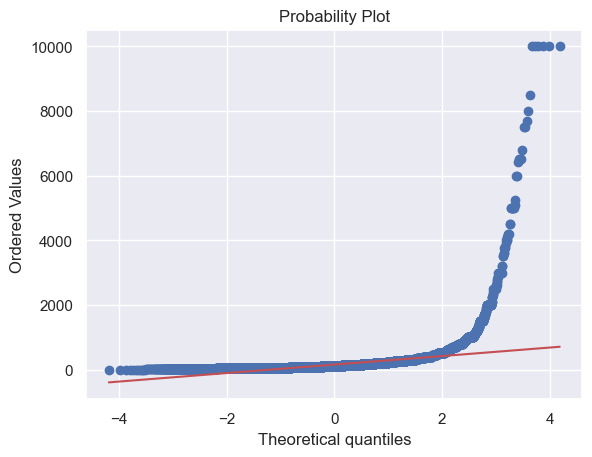

In [36]:
from scipy import stats
sns.distplot(airbnb_df['price'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(airbnb_df['price'], plot=plt)
plt.show()

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_66276/1245660706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_df['price'], fit=stats.norm);


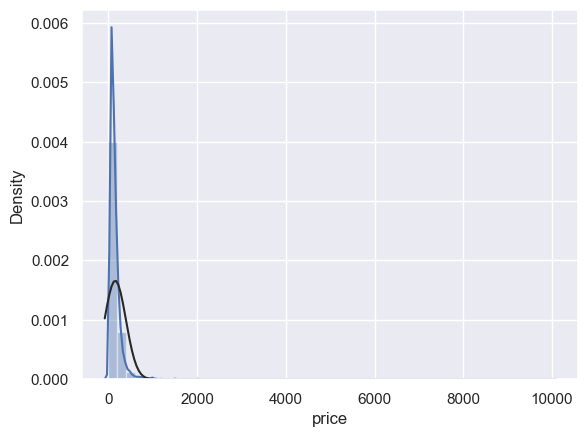

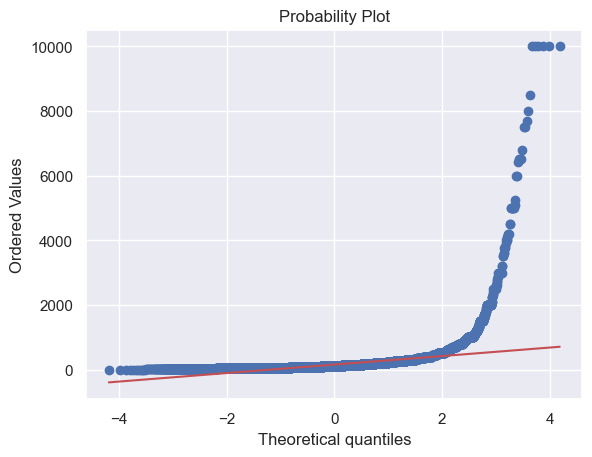

In [37]:
sns.distplot(airbnb_df['price'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(airbnb_df['price'], plot=plt)

In [38]:
features = ['name','host_name','neighbourhood_group','neighbourhood','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365','Seasons']
target = 'price'
X = airbnb_df[features]
Y = airbnb_df[target]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

print(scaledX)

[[-0.84238516 -0.13466313 -0.91792867 ... -0.03483678  1.91626254
  -2.10571086]
 [ 0.97718352 -0.19786723  0.44106527 ... -0.15618031  1.84028025
  -0.88551492]
 [ 1.41775109 -0.7787872   0.44106527 ... -0.18651619  1.91626254
  -0.88551492]
 ...
 [ 1.33980786 -0.35959535  0.44106527 ... -0.18651619 -0.65193887
   0.33468103]
 [-1.54872754  1.47642159  0.44106527 ... -0.03483678 -0.8418946
   0.33468103]
 [ 1.48982684 -1.07033157  0.44106527 ... -0.18651619 -0.68233179
   0.33468103]]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100,random_state=0)
lasso = Lasso(alpha=1.0)
RidgeR = ridge = Ridge(alpha=1.0)
LinearR = lr = LinearRegression()
Adab = adaboost = AdaBoostRegressor()
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
StackingR = stacking_reg = StackingRegressor(estimators=[('lr', model1), ('dt', model2)]) 



listr = [dt, rf, lasso,RidgeR,LinearR,Adab,StackingR]

In [41]:
all_models = []
for i in listr:
    i.fit(X_train, y_train)
    test_y_pred = i.predict(X_test)
    train_y_pred = i.predict(X_train)

    train_r2 = r2_score(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)

    test_r2 = r2_score(y_test, test_y_pred)
    test_mse = mean_squared_error(y_test, test_y_pred)
    test_mae = mean_absolute_error(y_test, test_y_pred)
    test_rmse = mean_squared_error(y_test, test_y_pred, squared=False)

    Machine_Learning_Model = ['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test']
    Model = [train_r2, test_r2,train_mse, test_mse,train_rmse,test_rmse, train_mae, test_mae],
    all_models.append(Model)

dtr = all_models[0][0]
rfr = all_models[1][0]
lassor = all_models[2][0]
RidgeR = all_models[3][0]
LinearR = all_models[4][0]
Adab = all_models[5][0]
StackingR =  all_models[6][0]

In [42]:
destree = pd.DataFrame(dtr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Decision Tree'])
ranforest = pd.DataFrame(rfr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Random forest'])
lassoc = pd.DataFrame(lassor, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Lasso'])
Ridgereg = pd.DataFrame(RidgeR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Ridge'])
linearR = pd.DataFrame(LinearR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Linear Regression'])
Adaboost = pd.DataFrame(Adab, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Adaboost Regression'])
StackingRegressor = pd.DataFrame(StackingR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Stacking Regression'])

In [43]:
dfs = [destree, ranforest, lassoc, Ridgereg, linearR, Adaboost, StackingRegressor]

merged_df = pd.concat(dfs, axis=1)
merged_df

,Decision Tree,Random forest,Lasso,Ridge,Linear Regression,Adaboost Regression,Stacking Regression
R2-train,0.999640,0.873614,0.016863,0.016938,0.016938,-0.722270,0.270563
R2-test,-1.527497,-0.026259,0.017563,0.017740,0.017740,-1.277652,0.020932
MSE-train,21.417289,7522.523012,58516.596296,58512.181593,58512.181592,102510.042535,43416.333124
MSE-test,127555.753582,51792.430328,49580.856641,49571.924596,49571.923062,114946.802640,49410.825580
RSME-train,4.627882,86.732480,241.902039,241.892913,241.892913,320.171895,208.365864
RSME-test,357.149484,227.579503,222.667592,222.647534,222.647531,339.038055,222.285460
MAE-train,0.045600,30.303591,90.973841,90.948800,90.948798,183.434313,77.986389
MAE-test,108.444740,80.805122,88.584462,88.563133,88.563130,187.071854,86.424447
